This assignment is a tutorial for Statistics in Python following the tutorial made by Gaël Varoquaux and with the link: https://scipy-lectures.org/packages/statistics/index.html.

# 3.1 Statistics in Python

## 3.1.1. Data representation and interaction

### 3.1.1.1. Data as a table

The setting that we consider for statistical analysis is that of multiple observations or samples described by a set of different attributes or features. The data can than be seen as a 2D table, or matrix, with columns giving the different attributes of the data, and rows the observations.

#### Data source: brain_size.csv

### 3.1.1.2. The pandas data-frame

We will store and manipulate this data in a pandas.DataFrame, from the pandas module. It is the Python equivalent of the spreadsheet table. It is different from a 2D numpy array as it has named columns, can contain a mixture of different data types by column, and has elaborate selection and pivotal mechanisms.

#### Creating dataframes: reading data files or converting arrays

Reading from a CSV file: Using the above CSV file that gives observations of brain size and weight and IQ (Willerman et al. 1991), the data are a mixture of numerical and categorical values:

In [4]:
import pandas
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")
data 

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


##### Warning: Missing Values
The weight of the second individual is missing in the CSV file. If we don’t specify the missing value (NA = not available) marker, we will not be able to do statistical analysis.

##### Creating from arrays
A pandas.DataFrame can also be seen as a dictionary of 1D ‘series’, eg arrays or lists. If we have 3 numpy arrays:

In [8]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

We can expose them as a pandas.DataFrame:

In [9]:
pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


##### Other inputs: 
pandas can input data from SQL, excel files, or other formats. See the pandas documentation.

#### Manipulating data

data is a pandas.DataFrame, that resembles R’s dataframe:

In [16]:
data.shape    # 40 rows and 8 columns
data.columns  # It has columns  
print(data['Gender'])  # Columns can be addressed by name 

# Simpler selector
data[data['Gender'] == 'Female']['VIQ'].mean()

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


np.float64(109.45)

##### Note
For a quick view on a large dataframe, use its describe method: pandas.DataFrame.describe().

##### groupby
splitting a dataframe on values of categorical variables:

In [17]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', np.float64(109.45))
('Male', np.float64(115.25))


groupby_gender is a powerful object that exposes many operations on the resulting group of dataframes:

In [18]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


Use tab-completion on groupby_gender to find more. Other common grouping functions are median, count (useful for checking to see the amount of missing values in different subsets) or sum. Groupby evaluation is lazy, no work is done until an aggregation function is applied.

#### Plotting data
Pandas comes with some plotting tools (pandas.tools.plotting, using matplotlib behind the scene) to display statistics of the data in dataframes:

##### Scatter matrices:

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

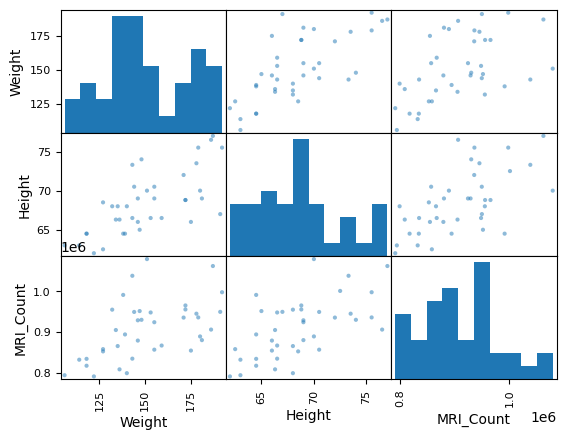

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])  

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

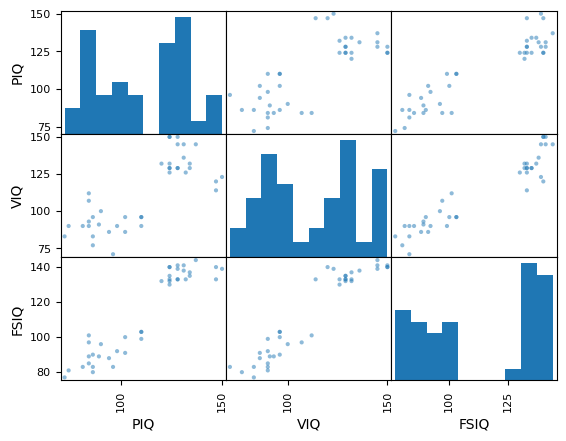

In [26]:
scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

##### Two populations
The IQ metrics are bimodal, as if there are 2 sub-populations.

## 3.1.2. Hypothesis testing: comparing two groups
For simple statistical tests, we will use the scipy.stats sub-module of scipy:

In [42]:
from scipy import stats

### 3.1.2.1. Student’s t-test: the simplest statistical test

#### 1-sample t-test: testing the value of a population mean
scipy.stats.ttest_1samp() tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value (see the function’s help):

In [30]:
stats.ttest_1samp(data['VIQ'], 0) 

TtestResult(statistic=np.float64(30.08809997084933), pvalue=np.float64(1.3289196468727879e-28), df=np.int64(39))

With a p-value of 10^-28 we can claim that the population mean for the IQ (VIQ measure) is not 0.

#### 2-sample t-test: testing for difference across populations
We have seen above that the mean VIQ in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind():

In [31]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)  

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

### 3.1.2.2. Paired tests: repeated measurements on the same individuals
PIQ, VIQ, and FSIQ give 3 measures of IQ. Let us test if FISQ and PIQ are significantly different. We can use a 2 sample test:

In [32]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus the variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or “repeated measures test”:

In [33]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

This is equivalent to a 1-sample test on the difference:

In [34]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption:

In [35]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=np.float64(274.5), pvalue=np.float64(0.10659492713506856))

#### Note:
The corresponding test in the non paired case is the Mann–Whitney U test, scipy.stats.mannwhitneyu().

## 3.1.3. Linear models, multiple factors, and analysis of variance

### 3.1.3.1. “formulas” to specify statistical models in Python

#### A simple linear regression
Given two set of observations, x and y, we want to test the hypothesis that y is a linear function of x. In other terms:

y = x * \textit{coef} + \textit{intercept} + e
where e is observation noise. We will use the statsmodels module to:

1. Fit a linear model. We will use the simplest strategy, ordinary least squares (OLS).
2. Test that coef is non zero.

First, we generate simulated data according to the model:

In [37]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pandas.DataFrame({'x': x, 'y': y})

Then we specify an OLS model and fit it:

In [40]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

We can inspect the various statistics derived from the fit:

In [41]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           8.56e-08
Time:                        08:54:01   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

##### Terminology
Statsmodels uses a statistical terminology: the y variable in statsmodels is called ‘endogenous’ while the x variable is called exogenous. This is discussed in more detail here.

To simplify, y (endogenous) is the value you are trying to predict, while x (exogenous) represents the features you are using to make the prediction.

#### Categorical variables: comparing groups or multiple categories
Let us go back the data on brain size:

In [43]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")

We can write a comparison between IQ of male and female using a linear model:

In [44]:
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Wed, 16 Jul 2025   Prob (F-statistic):              0.445
Time:                        08:57:53   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

#### Tips on specifying model
##### Forcing categorical:
the ‘Gender’ is automatically detected as a categorical variable, and thus each of its different values are treated as different entities.

An integer column can be forced to be treated as categorical using:

In [45]:
model = ols('VIQ ~ C(Gender)', data).fit()

##### Intercept:
We can remove the intercept using - 1 in the formula, or force the use of an intercept using + 1.

By default, statsmodels treats a categorical variable with K possible values as K-1 ‘dummy’ boolean variables (the last level being absorbed into the intercept term). This is almost always a good default choice - however, it is possible to specify different encodings for categorical variables (http://statsmodels.sourceforge.net/devel/contrasts.html).

#### Link to t-tests between different FSIQ and PIQ
To compare different types of IQ, we need to create a “long-form” table, listing IQs, where the type of IQ is indicated by a categorical variable:

In [47]:
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long)  

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


In [48]:
model = ols("iq ~ type", data_long).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Wed, 16 Jul 2025   Prob (F-statistic):              0.643
Time:                        09:00:59   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

We can see that we retrieve the same values for t-test and corresponding p-values for the effect of the type of iq than the previous t-test:

In [49]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

### 3.1.3.2. Multiple Regression: including multiple factors
Consider a linear model explaining a variable z (the dependent variable) with 2 variables x and y:
z = x \, c_1 + y \, c_2 + i + e
Such a model can be seen in 3D as fitting a plane to a cloud of (x, y, z) points.

##### Example: the iris data (examples/iris.csv)
Sepal and petal size tend to be related: bigger flowers are bigger! But is there in addition a systematic effect of species?

In [51]:
data = pandas.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           1.58e-20
Time:                        09:04:35   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

### 3.1.3.3. Post-hoc hypothesis testing: analysis of variance (ANOVA)
In the above iris example, we wish to test if the petal length is different between versicolor and virginica, after removing the effect of sepal width. This can be formulated as testing the difference between the coefficient associated to versicolor and virginica in the linear model estimated above (it is an Analysis of Variance, ANOVA). For this, we write a vector of ‘contrast’ on the parameters estimated: we want to test "name[T.versicolor] - name[T.virginica]", with an F-test:

In [52]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=3.245335346574177, p=0.0736905878170114, df_denom=146, df_num=1>


Is this difference significant?

## 3.1.4. More visualization: seaborn for statistical exploration
Seaborn combines simple statistical fits with plotting on pandas dataframes.

Let us consider a data giving wages and many other personal information on 500 individuals (Berndt, ER. The Practice of Econometrics. 1991. NY: Addison-Wesley).

The full code loading and plotting of the wages data is found in corresponding example.

In [55]:
import seaborn as sns  
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [56]:
import urllib.request
import os
if not os.path.exists('wages.txt'):
    urllib.request.urlretrieve(
        'http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
        'wages.txt'
    )

In [57]:
import pandas as pd

names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

# Read the file
data = pd.read_csv(
    'wages.txt',
    skiprows=27,
    skipfooter=6,
    sep=None,
    header=None,
    engine='python'
)

data.columns = short_names

In [58]:
print(data)

     EDUCATION  SOUTH  SEX  EXPERIENCE  UNION   WAGE  AGE  RACE  OCCUPATION  \
0            8      0    1          21      0   5.10   35     2           6   
1            9      0    1          42      0   4.95   57     3           6   
2           12      0    0           1      0   6.67   19     3           6   
3           12      0    0           4      0   4.00   22     3           6   
4           12      0    0          17      0   7.50   35     3           6   
..         ...    ...  ...         ...    ...    ...  ...   ...         ...   
529         18      0    0           5      0  11.36   29     3           5   
530         12      0    1          33      0   6.10   51     1           5   
531         17      0    1          25      1  23.25   48     1           5   
532         12      1    0          13      1  19.88   31     3           5   
533         16      0    0          33      0  15.38   55     3           5   

     SECTOR  MARR  
0         1     1  
1         1

### 3.1.4.1. Pairplot: scatter matrices
We can easily have an intuition on the interactions between continuous variables using seaborn.pairplot() to display a scatter matrix:

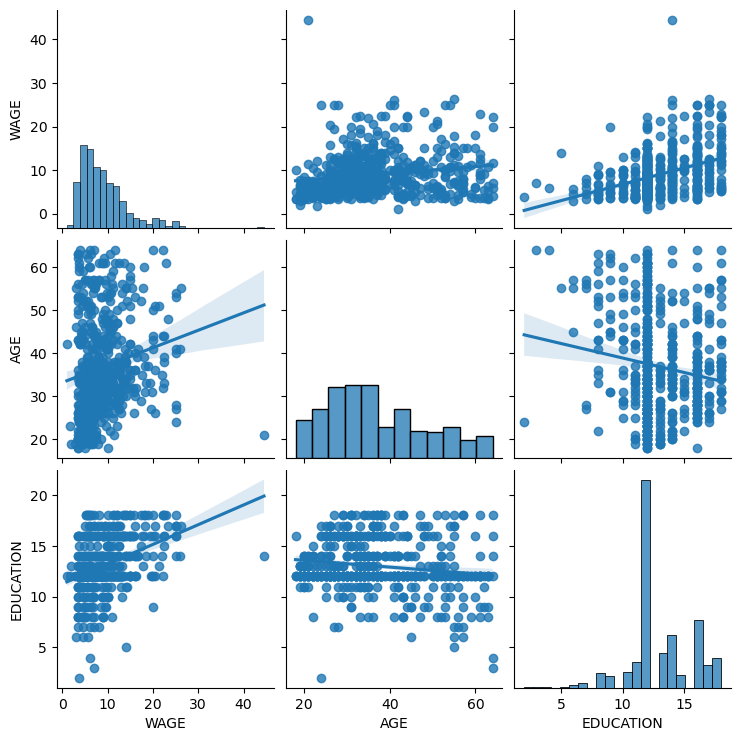

In [59]:
import seaborn
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg')  

Categorical variables can be plotted as the hue:

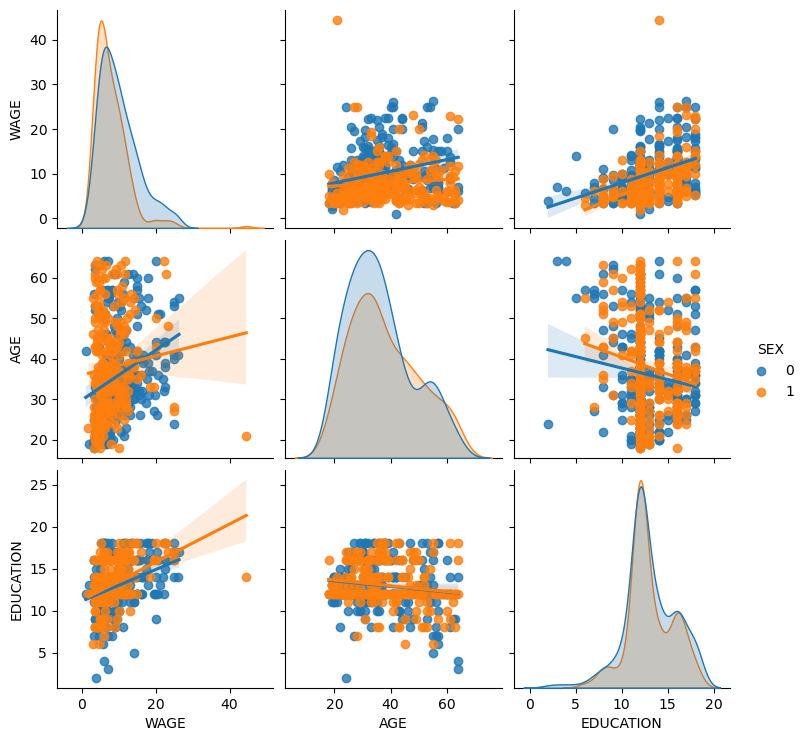

In [60]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='SEX') 

##### Look and feel and matplotlib settings
Seaborn changes the default of matplotlib figures to achieve a more “modern”, “excel-like” look. It does that upon import. You can reset the default using:

In [61]:
from matplotlib import pyplot as plt
plt.rcdefaults()

### 3.1.4.2. lmplot: plotting a univariate regression
A regression capturing the relation between one variable and another, eg wage and eduction, can be plotted using seaborn.lmplot():

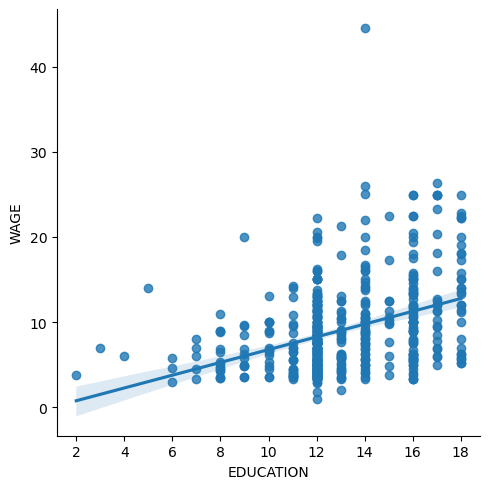

In [62]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)  

##### Robust regression
Given that, in the above plot, there seems to be a couple of data points that are outside of the main cloud to the right, they might be outliers, not representative of the population, but driving the regression.

To compute a regression that is less sentive to outliers, one must use a robust model. This is done in seaborn using robust=True in the plotting functions, or in statsmodels by replacing the use of the OLS by a “Robust Linear Model”, statsmodels.formula.api.rlm().

## 3.1.5. Testing for interactions
Do wages increase more with education for males than females?

The plot above is made of two different fits. We need to formulate a single model that tests for a variance of slope across the two populations. This is done via an “interaction”.

In [68]:
import statsmodels.formula.api as sm
result = sm.ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX',
                data=data).fit()    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     41.50
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           4.24e-24
Time:                        10:14:01   Log-Likelihood:                -1575.0
No. Observations:                 534   AIC:                             3158.
Df Residuals:                     530   BIC:                             3175.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1046      1.314      0.841

Can we conclude that education benefits males more than females?

##### Take home messages
-Hypothesis testing and p-values give you the significance of an effect / difference. 

-Formulas (with categorical variables) enable you to express rich links in your data.

-Visualizing your data and fitting simple models give insight into the data.

-Conditionning (adding factors that can explain all or part of the variation) is an important modeling   aspect that changes the interpretation.

## 3.1.6. Full code for the figures
Code examples for the statistics chapter.

### 3.1.6.1. Boxplots and paired differences
Plot boxplots for FSIQ, PIQ, and the paired difference between the two: while the spread (error bars) for FSIQ and PIQ are very large, there is a systematic (common) effect due to the subjects. This effect is cancelled out in the difference and the spread of the difference (“paired” by subject) is much smaller than the spread of the individual measures.

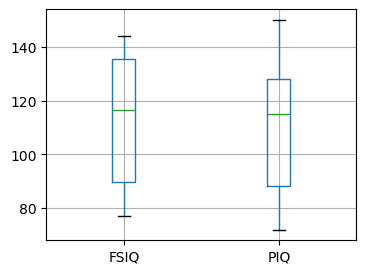

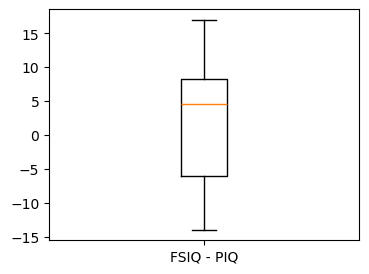

In [69]:
import pandas

import matplotlib.pyplot as plt

data = pandas.read_csv('brain_size.csv', sep=';', na_values='.')

# Box plot of FSIQ and PIQ (different measures od IQ)
plt.figure(figsize=(4, 3))
data.boxplot(column=['FSIQ', 'PIQ'])

# Boxplot of the difference
plt.figure(figsize=(4, 3))
plt.boxplot(data['FSIQ'] - data['PIQ'])
plt.xticks((1, ), ('FSIQ - PIQ', ))

plt.show()

### 3.1.6.2. Plotting simple quantities of a pandas dataframe
This example loads from a CSV file data with mixed numerical and categorical entries, and plots a few quantities, separately for females and males, thanks to the pandas integrated plotting tool (that uses matplotlib behind the scene).

See http://pandas.pydata.org/pandas-docs/stable/visualization.html

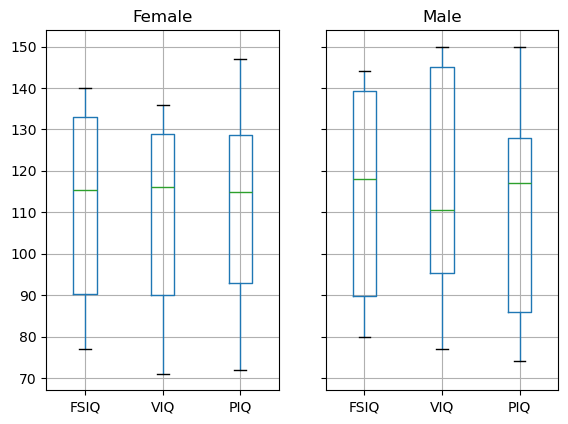

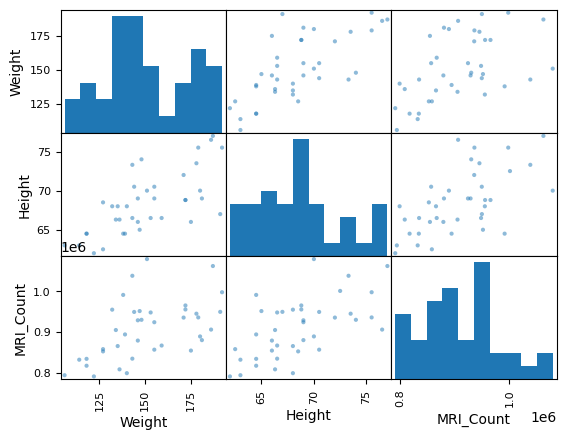

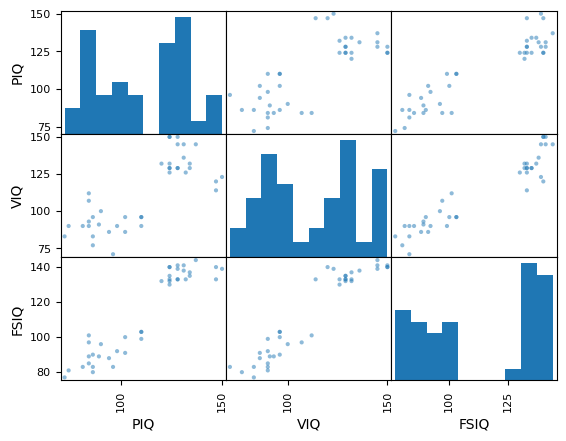

In [71]:
import pandas

data = pandas.read_csv('brain_size.csv', sep=';', na_values='.')

# Box plots of different columns for each gender
groupby_gender = data.groupby('Gender')
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])

from pandas.plotting import scatter_matrix

# Scatter matrices for different columns
scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

import matplotlib.pyplot as plt
plt.show()

### 3.1.6.3. Analysis of Iris petal and sepal sizes
Ilustrate an analysis on a real dataset:

Visualizing the data to formulate intuitions

Fitting of a linear model

Hypothesis test of the effect of a categorical variable in the presence of a continuous confound

In [74]:
import matplotlib.pyplot as plt

import pandas
from pandas.plotting import scatter_matrix

from statsmodels.formula.api import ols

# Load the data
data = pandas.read_csv('iris.csv')

Plot a scatter matrix

Text(0.5, 0.98, 'blue: setosa, green: versicolor, red: virginica')

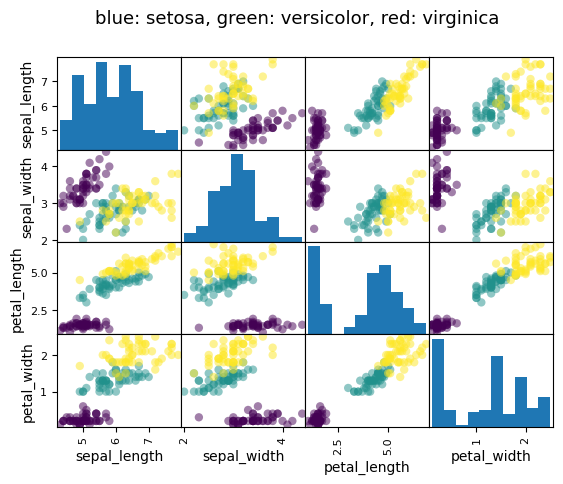

In [76]:
# Express the names as categories
categories = pandas.Categorical(data['name'])

# The parameter 'c' is passed to plt.scatter and will control the color
scatter_matrix(data, c=categories.codes, marker='o')

fig = plt.gcf()
fig.suptitle("blue: setosa, green: versicolor, red: virginica", size=13)

Statistical analysis

In [77]:
# Let us try to explain the sepal length as a function of the petal
# width and the category of iris

model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())

# Now formulate a "contrast", to test if the offset for versicolor and
# virginica are identical

print('Testing the difference between effect of versicolor and virginica')
print(model.f_test([0, 1, -1, 0]))
plt.show()

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           1.58e-20
Time:                        10:21:28   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

### 3.1.6.4. Simple Regression
Fit a simple linear regression using ‘statsmodels’, compute corresponding p-values.

In [78]:
# Original author: Thomas Haslwanter

import numpy as np
import matplotlib.pyplot as plt
import pandas

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

Generate and show the data

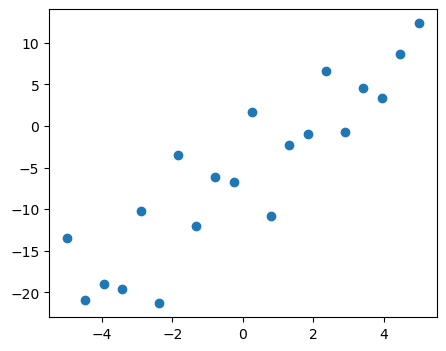

In [79]:
x = np.linspace(-5, 5, 20)

# To get reproducable values, provide a seed value
np.random.seed(1)

y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

# Plot the data
plt.figure(figsize=(5, 4))
plt.plot(x, y, 'o')

Multilinear regression model, calculating fit, P-values, confidence intervals etc.

In [80]:
# Convert the data into a Pandas DataFrame to use the formulas framework
# in statsmodels
data = pandas.DataFrame({'x': x, 'y': y})

# Fit the model
model = ols("y ~ x", data).fit()

# Print the summary
print(model.summary())

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           8.56e-08
Time:                        10:22:46   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

Plot the fitted model

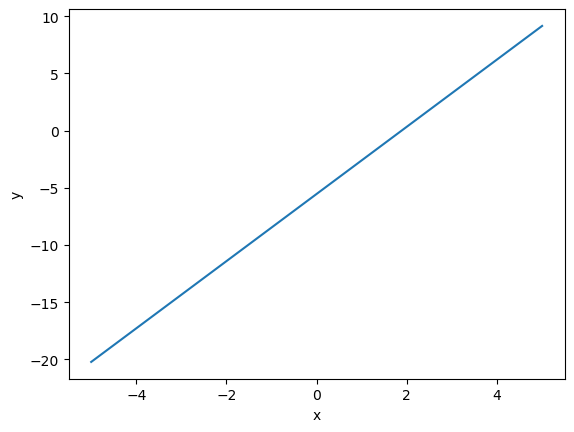

In [81]:
# Retrieve the parameter estimates
offset, coef = model._results.params
plt.plot(x, x*coef + offset)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### 3.1.6.5. Multiple Regression
Calculate using ‘statsmodels’ just the best fit, or all the corresponding statistical parameters.

Also shows how to make 3d plots.

In [2]:
# Original author: Thomas Haslwanter

import numpy as np
import matplotlib.pyplot as plt
import pandas

# For 3d plots. This import is necessary to have 3D plotting below
from mpl_toolkits.mplot3d import Axes3D

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

Generate and show the data

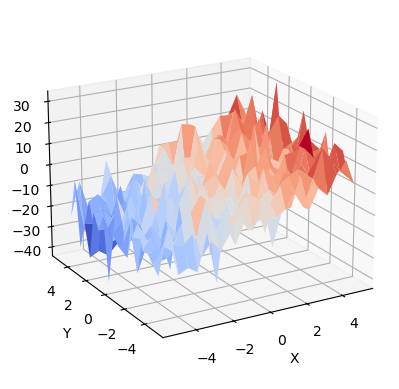

In [4]:
x = np.linspace(-5, 5, 21)
# We generate a 2D grid
X, Y = np.meshgrid(x, x)

# To get reproducable values, provide a seed value
np.random.seed(1)

# Z is the elevation of this 2D grid
Z = -5 + 3*X - 0.5*Y + 8 * np.random.normal(size=X.shape)

# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       rstride=1, cstride=1)
ax.view_init(20, -120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Multilinear regression model, calculating fit, P-values, confidence intervals etc.

In [5]:
# Convert the data into a Pandas DataFrame to use the formulas framework
# in statsmodels

# First we need to flatten the data: it's 2D layout is not relevent.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

data = pandas.DataFrame({'x': X, 'y': Y, 'z': Z})

# Fit the model
model = ols("z ~ x + y", data).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)
# should be array([-4.99754526,  3.00250049, -0.50514907])

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

plt.show()

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     320.4
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           1.89e-86
Time:                        13:41:11   Log-Likelihood:                -1537.7
No. Observations:                 441   AIC:                             3081.
Df Residuals:                     438   BIC:                             3094.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5052      0.378    -11.924      0.0

### 3.1.6.6. Test for an education/gender interaction in wages
Wages depend mostly on education. Here we investigate how this dependence is related to gender: not only does gender create an offset in wages, it also seems that wages increase more with education for males than females.

Does our data support this last hypothesis? We will test this using statsmodels’ formulas (http://statsmodels.sourceforge.net/stable/example_formulas.html).

Load and massage the data

In [7]:
import pandas
import urllib
import os
if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

# EDUCATION: Number of years of education
# SEX: 1=Female, 0=Male
# WAGE: Wage (dollars per hour)
data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None, names=['education', 'gender', 'wage'],
                       usecols=[0, 2, 5], engine='python'
                       )

# Convert genders to strings (this is particulary useful so that the
# statsmodels formulas detects that gender is a categorical variable)
import numpy as np
data['gender'] = np.choose(data.gender, ['male', 'female'])

# Log-transform the wages, because they typically are increased with
# multiplicative factors
data['wage'] = np.log10(data['wage'])

simple plotting

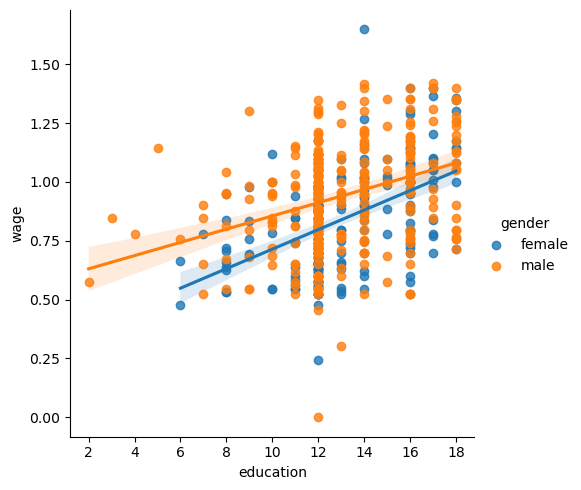

In [8]:
import seaborn

# Plot 2 linear fits for male and female.
seaborn.lmplot(y='wage', x='education', hue='gender', data=data)

statistical analysis

In [9]:
import statsmodels.formula.api as sm

# Note that this model is not the plot displayed above: it is one
# joined model for male and female, not separate models for male and
# female. The reason is that a single model enables statistical testing
result = sm.ols(formula='wage ~ education + gender', data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     63.42
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           2.01e-25
Time:                        13:43:35   Log-Likelihood:                 86.654
No. Observations:                 534   AIC:                            -167.3
Df Residuals:                     531   BIC:                            -154.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4053      0.046      8.

The plots above highlight that there is not only a different offset in wage but also a different slope

We need to model this using an interaction

In [10]:
result = sm.ols(formula='wage ~ education + gender + education * gender',
                data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           2.94e-25
Time:                        13:43:51   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Looking at the p-value of the interaction of gender and education, the data does not support the hypothesis that education benefits males more than female (p-value > 0.05).

In [11]:
import matplotlib.pyplot as plt
plt.show()

### 3.1.6.7. Visualizing factors influencing wages
This example uses seaborn to quickly plot various factors relating wages, experience and eduction.

Seaborn (https://seaborn.pydata.org) is a library that combines visualization and statistical fits to show trends in data.

Note that importing seaborn changes the matplotlib style to have an “excel-like” feeling. This changes affect other matplotlib figures. To restore defaults once this example is run, we would need to call plt.rcdefaults().

In [12]:
# Standard library imports
import urllib
import os
import matplotlib.pyplot as plt

Load the data

In [14]:
import pandas

if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

# Give names to the columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None, engine='python')
data.columns = short_names

# Log-transform the wages, because they typically are increased with
# multiplicative factors
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])

Plot scatter matrices highlighting different aspects

Text(0.5, 0.98, 'Effect of union: 1=Union member, 0=Not union member')

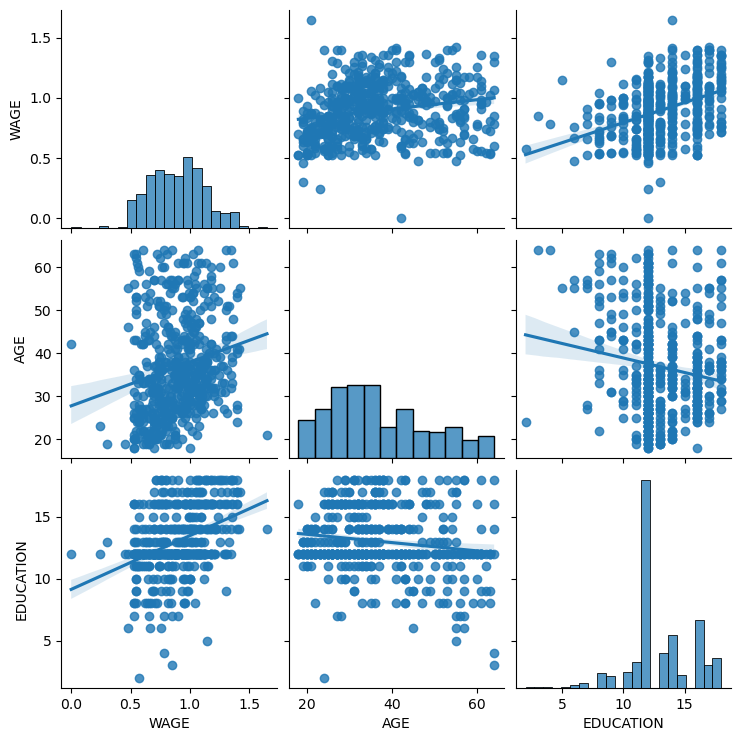

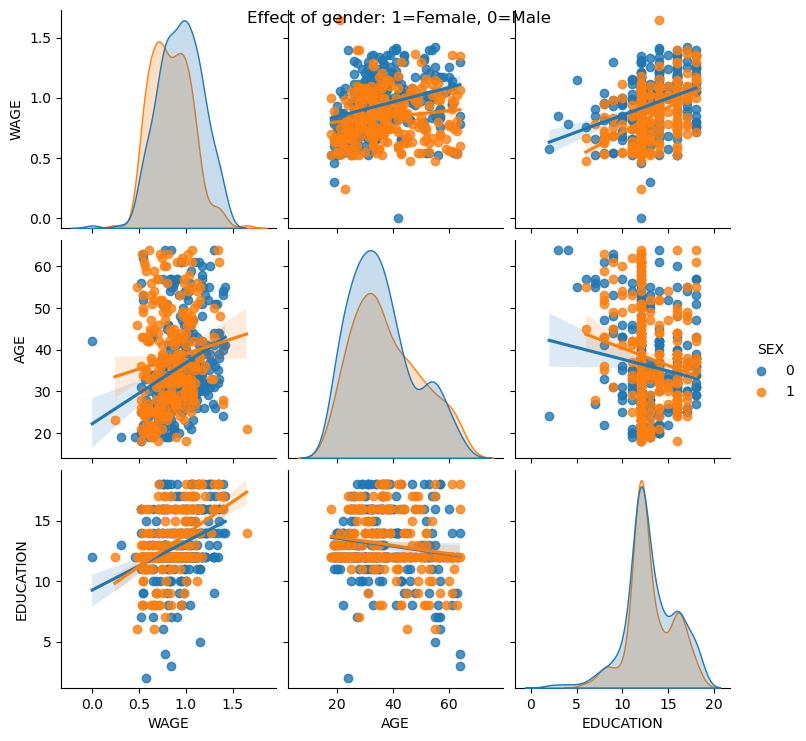

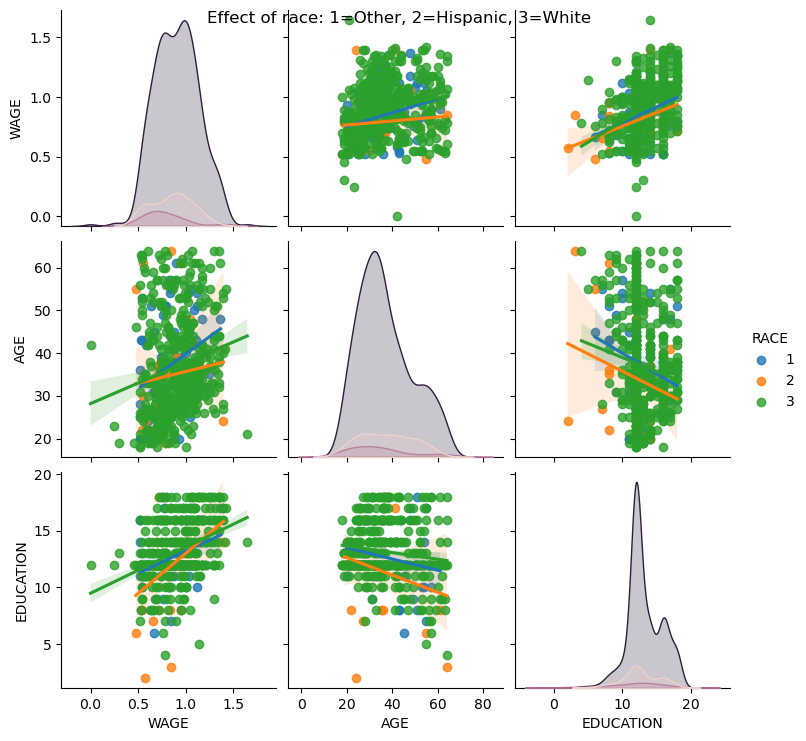

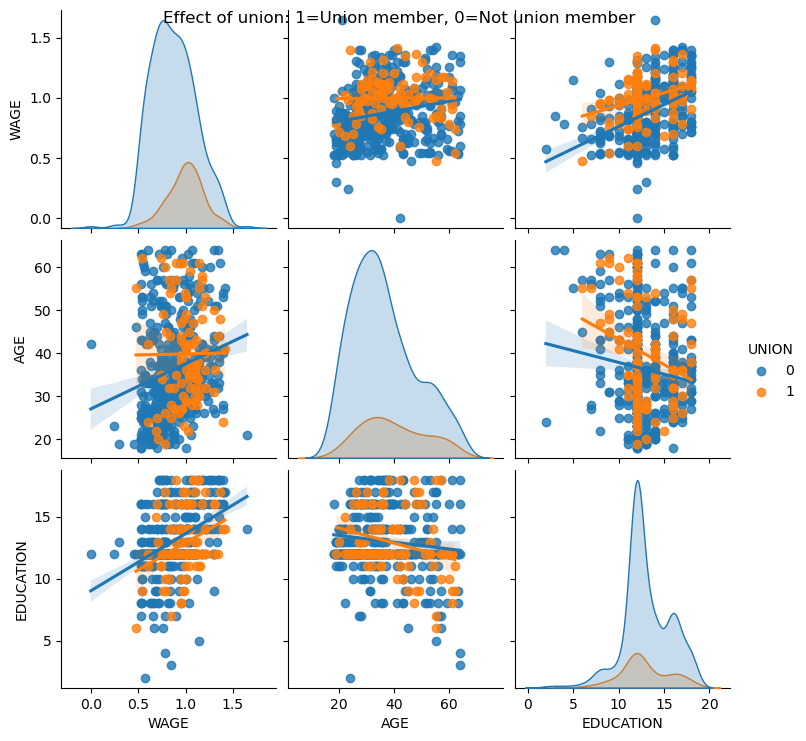

In [15]:
import seaborn
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='SEX')
plt.suptitle('Effect of gender: 1=Female, 0=Male')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member')

Plot a simple regression

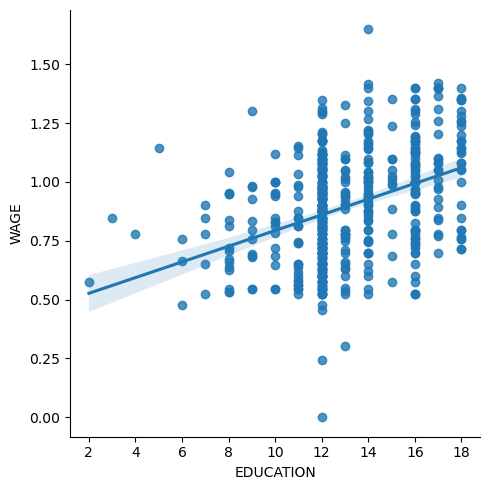

In [16]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)

plt.show()

### 3.1.6.8. Air fares before and after 9/11
This is a business-intelligence (BI) like application.

What is interesting here is that we may want to study fares as a function of the year, paired accordingly to the trips, or forgetting the year, only as a function of the trip endpoints.

Using statsmodels’ linear models, we find that both with an OLS (ordinary least square) and a robust fit, the intercept and the slope are significantly non-zero: the air fares have decreased between 2000 and 2001, and their dependence on distance travelled has also decreased.

In [19]:
# Standard library imports
import urllib
import os
from urllib.request import urlretrieve

Load the data

In [23]:
import pandas

if not os.path.exists('airfares.txt'):
    # Download the file if it is not present
    urlretrieve(
        'http://www.stat.ufl.edu/~winner/data/airq4.dat',
                       'airfares.txt')

# As a seperator, ' +' is a regular expression that means 'one of more
# space'
data = pandas.read_csv('airfares.txt', sep=' +', header=0, engine='python',
                       names=['city1', 'city2', 'pop1', 'pop2',
                              'dist', 'fare_2000', 'nb_passengers_2000',
                              'fare_2001', 'nb_passengers_2001'])

# we log-transform the number of passengers
import numpy as np
data['nb_passengers_2000'] = np.log10(data['nb_passengers_2000'])
data['nb_passengers_2001'] = np.log10(data['nb_passengers_2001'])

Make a dataframe whith the year as an attribute, instead of separate columns

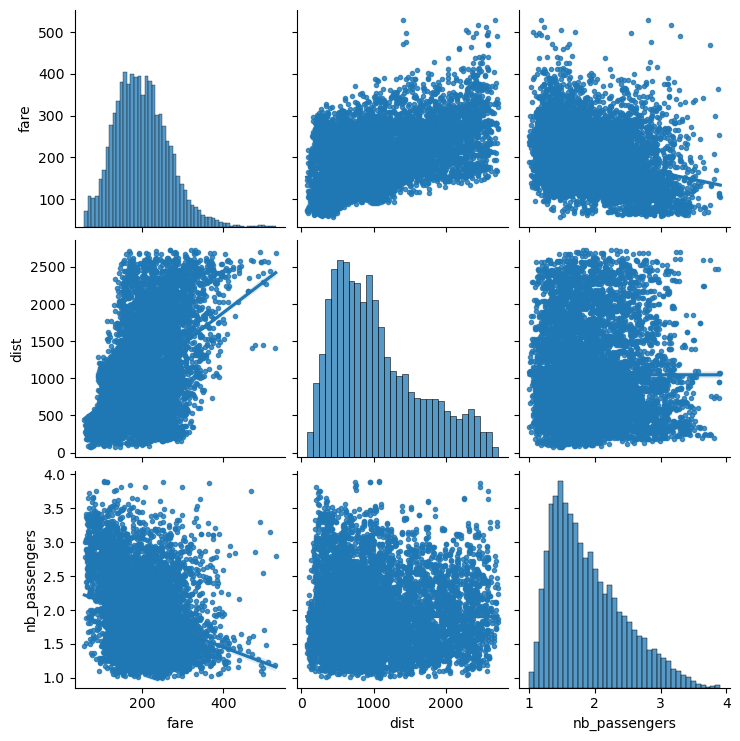

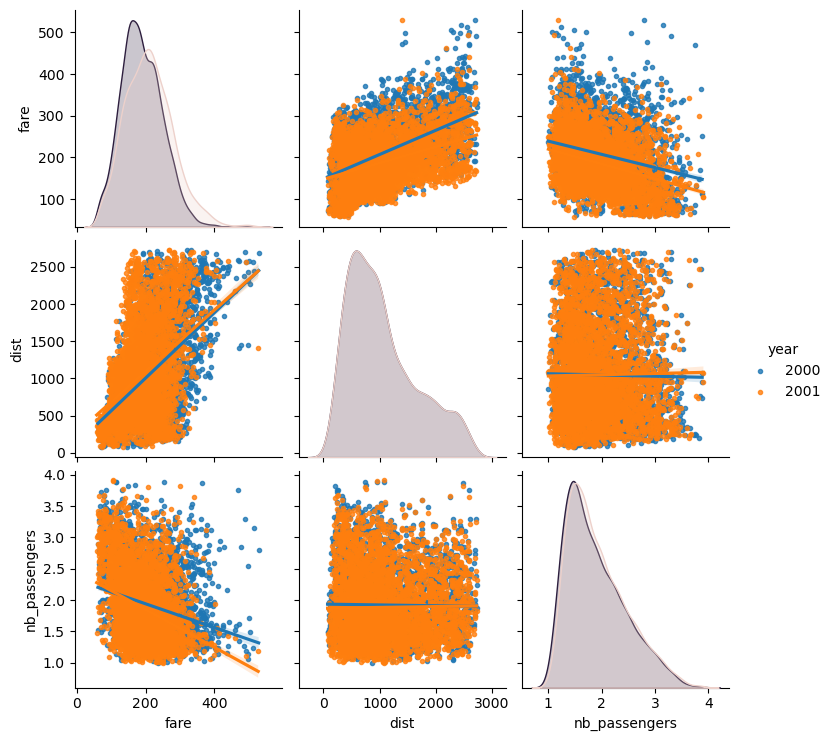

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np

# Make an index of each flight
data_flat = data.reset_index()

data_2000 = data_flat[['city1', 'city2', 'pop1', 'pop2',
                       'dist', 'fare_2000', 'nb_passengers_2000']].copy()
data_2000.columns = ['city1', 'city2', 'pop1', 'pop2', 'dist', 'fare', 'nb_passengers']
data_2000['year'] = 2000  # ✅ Add column safely

data_2001 = data_flat[['city1', 'city2', 'pop1', 'pop2',
                       'dist', 'fare_2001', 'nb_passengers_2001']].copy()
data_2001.columns = ['city1', 'city2', 'pop1', 'pop2', 'dist', 'fare', 'nb_passengers']
data_2001['year'] = 2001  # ✅ Add column safely

# Concatenate the two
data_flat = pd.concat([data_2000, data_2001], ignore_index=True)

# Plot scatter matrices highlighting different aspects
sns.pairplot(data_flat, vars=['fare', 'dist', 'nb_passengers'],
             kind='reg', markers='.')

# Show the effect of the year (e.g., 9/11 effect)
sns.pairplot(data_flat, vars=['fare', 'dist', 'nb_passengers'],
             kind='reg', hue='year', markers='.')

Plot the difference in fare

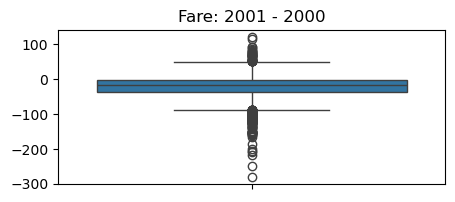

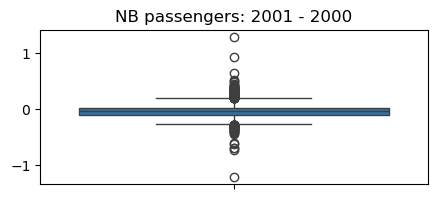

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 2))
seaborn.boxplot(data.fare_2001 - data.fare_2000)
plt.title('Fare: 2001 - 2000')
plt.subplots_adjust()

plt.figure(figsize=(5, 2))
seaborn.boxplot(data.nb_passengers_2001 - data.nb_passengers_2000)
plt.title('NB passengers: 2001 - 2000')
plt.subplots_adjust()

Statistical testing: dependence of fare on distance and number of passengers

In [29]:
import statsmodels.formula.api as sm

result = sm.ols(formula='fare ~ 1 + dist + nb_passengers', data=data_flat).fit()
print(result.summary())

# Using a robust fit
result = sm.rlm(formula='fare ~ 1 + dist + nb_passengers', data=data_flat).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1585.
Date:                Wed, 16 Jul 2025   Prob (F-statistic):               0.00
Time:                        13:54:49   Log-Likelihood:                -45532.
No. Observations:                8352   AIC:                         9.107e+04
Df Residuals:                    8349   BIC:                         9.109e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       211.2428      2.466     85.669

Statistical testing: regression of fare on distance: 2001/2000 difference

                            OLS Regression Results                            
Dep. Variable:              fare_2001   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     791.7
Date:                Wed, 16 Jul 2025   Prob (F-statistic):          1.20e-159
Time:                        13:55:05   Log-Likelihood:                -22640.
No. Observations:                4176   AIC:                         4.528e+04
Df Residuals:                    4174   BIC:                         4.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    148.0279      1.673     88.480      0.0

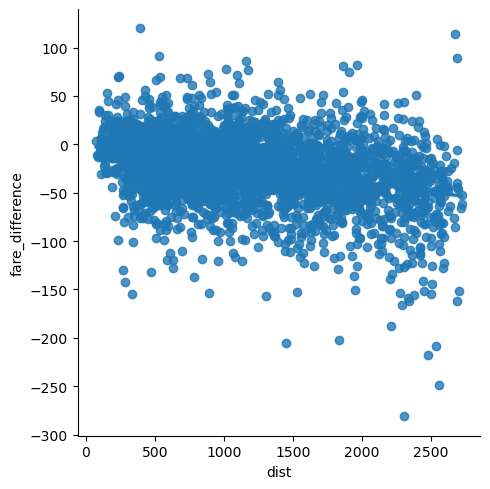

In [30]:
result = sm.ols(formula='fare_2001 - fare_2000 ~ 1 + dist', data=data).fit()
print(result.summary())

# Plot the corresponding regression
data['fare_difference'] = data['fare_2001'] - data['fare_2000']
seaborn.lmplot(x='dist', y='fare_difference', data=data)

plt.show()

## 3.1.7. Solutions to this chapter’s exercises

### 3.1.7.1. Relating Gender and IQ
Going back to the brain size + IQ data, test if the VIQ of male and female are different after removing the effect of brain size, height and weight.

Notice that here ‘Gender’ is a categorical value. As it is a non-float data type, statsmodels is able to automatically infer this.

In [33]:
import pandas
from statsmodels.formula.api import ols

data = pandas.read_csv('brain_size.csv', sep=';', na_values='.')

model = ols('VIQ ~ Gender + MRI_Count + Height', data).fit()
print(model.summary())

# Here, we don't need to define a contrast, as we are testing a single
# coefficient of our model, and not a combination of coefficients.
# However, defining a contrast, which would then be a 'unit contrast',
# will give us the same results
print(model.f_test([0, 1, 0, 0]))

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.809
Date:                Wed, 16 Jul 2025   Prob (F-statistic):             0.0184
Time:                        13:56:04   Log-Likelihood:                -172.34
No. Observations:                  39   AIC:                             352.7
Df Residuals:                      35   BIC:                             359.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        166.6258     88.824      1.

Here we plot a scatter matrix to get intuitions on our results. This goes beyond what was asked in the exercise

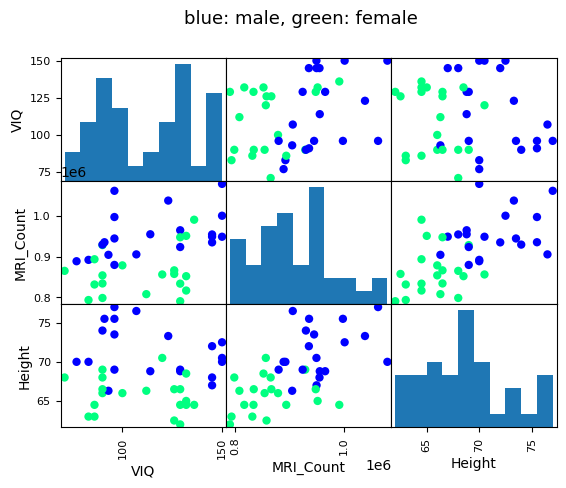

In [36]:
# This plotting is useful to get an intuitions on the relationships between
# our different variables

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Fill in the missing values for Height for plotting
data['Height'] = data['Height'].ffill()

# The parameter 'c' is passed to plt.scatter and will control the color
# The same holds for parameters 'marker', 'alpha' and 'cmap', that
# control respectively the type of marker used, their transparency and
# the colormap
scatter_matrix(data[['VIQ', 'MRI_Count', 'Height']],
                        c=(data['Gender'] == 'Female'), marker='o',
                        alpha=1, cmap='winter')

fig = plt.gcf()
fig.suptitle("blue: male, green: female", size=13)

plt.show()

# Conclusion
This ends this tutorial assignment. All the files are uploaded the github page.